# Malaria Predictiom (Cell Image Classification) using CNN/Transfer Learning ResNET and VGG16
- By Divit Saini

### Background:
Malaria is an infectious disease characterirosed by cycles of fever, chills and sweating, cause by a protozoan of the genus **Plasmodium** in red blood cells, which is transmitted to humans by the bite of an infected female anopheles mosquito. Around 3.3. biliion people in 106 countrie and territories live in areas at risk of malaria transmission. [1]

According to World Health Organisation, more than 400,000 people died in 2020. Tropical and subtropical regions near the equator, including much of Sub-Saharan Africa and Asia, are infected with the disease. The disease can be found all over India at any time of year. Due to mosquito breeding, it is more common during and after the rainy season.[2]

Even in areas where malaria transmission has been significantly decreased, WHO recommends the use of insecticide-treated nets (ITNs) for all populations at risk of malaria. In 2017, an estimated 50 percent of people in Sub-Saharan Africa at risk of malaria slept under an ITN, up from 29 percent in 2010. However, after 2015, ITN coverage has only slightly increased. Depending on the area you are travelling and your individual risk factors for infection, you may also want to take preventive medicine before, during and after your trip. Many malaria parasites are now resistant to the most common drugs used to treat the disease.




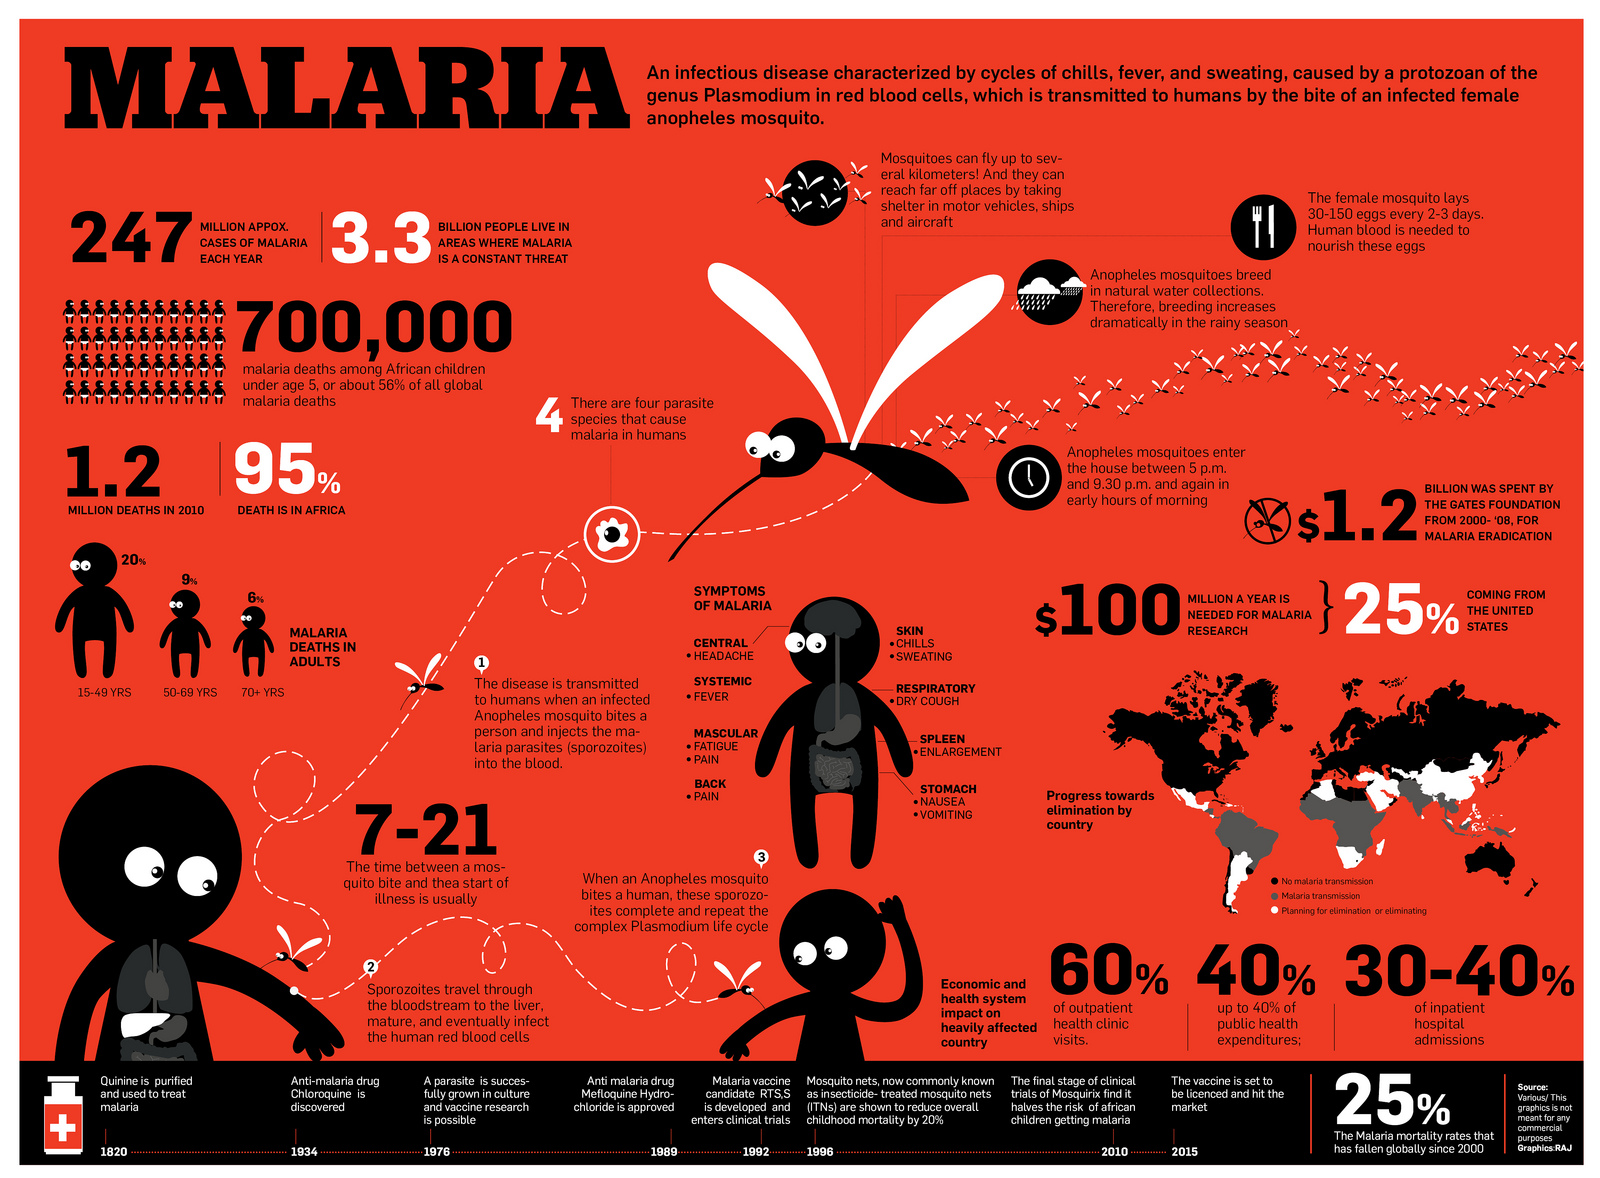


Early diagnosis and treatment of malaria reduces disease and prevents deaths. It also contributes to reducing malaria transmission. Access to diagnostic testing and treatment should be seen not only as a component of malaria control but as a fundamental right of all populations at risk. In the United States, a delay in diagnosis and treatment is the major cause of death among malaria patients. Malaria might be suspected based on a number of variables, including the patient's travel history, symptoms, and physical exam findings. However, laboratory tests must show the presence of malaria parasites or their components in order to make a conclusive diagnosis.

### Objective
In this project, I have used Convolutional Neural Network (CNN) using ResNet50 and VGG16 Pre-Trained Models to classify Malaria cell images as Parasitized or Uninfected taken from human blood samples. This notebook also mentions a performance comparison table between the two pre-trained models and the testing of images is carried out on the best performing model. The testing is carried out by creating a simple UI by gradio library


### Dataset Description

The dataset is available at: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria. 

I have split the dataset into **70% training, 20% validation and 10% testing sets. The total number images are 27558 with varying dimensions.** The dataset contains equal number of images in both the classes. I have implemented the code using tensorflow and keras. I have obtained a testing accuracy of over 92.78%.

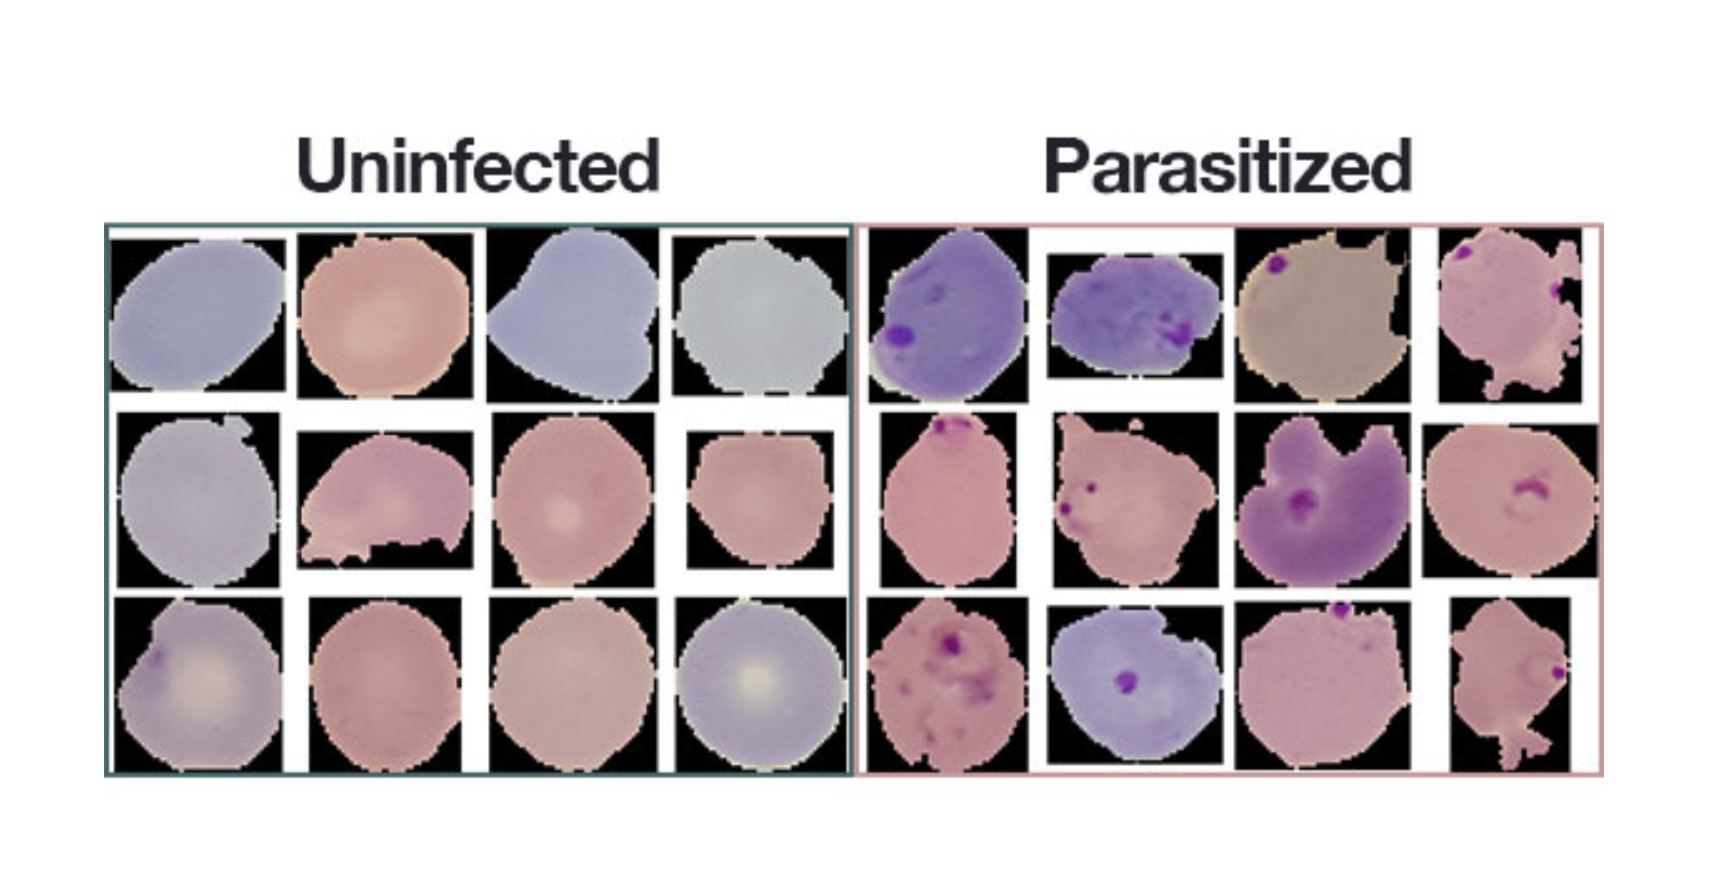

### Methodology
In this notebook, we adopt a deep convolution neural network (CNN) using transfer learning approach for classifying Malaria Cell images (Parasitizes and Infected). It highlights a step by step approach on how to implement a deep CNN to perform image classification problem on waste data (images). The implementation methodology is as follows:

1. Importing the DATASET using kaggle API
    1. Downloading, unzipping and creating train, test, val folders


2. Exploratory Data Analysis 
    1. Visualising and counting the number of images in each train and test images


3. Data Augmentation
    1. Augmenting the existing data by using zoom, shear, flip.. parameters of ImageDataGenerator
    2. Creating a Training, Validation and Testing dataset using Flow_from_directory method of ImageDataGenerator and batch size.
    

4. Modeling - VGG16:
    1. VGG16 - overview
    2. Model Architecture
    3. Defining Callbacks and compiliation
    4. Training the model
    5. Validation and training Loss/Accuracy plots
    

5. Modeling - ResNet50:
    1. ResNet50 - overview
    2. Model Architecture
    3. Defining Callbacks and compiliation
    4. Training the model
    5. Validation and training Loss/Accuracy plots
    
   
6. Comparison between the two pre-trained models 

        
7. Testing
    - We even create a simple UI using gradio library to test the model


8. Conclusion


9. References


Note: This was initially implemented on Google Colab. To make it work on jupyter notebook, we have to install kaggle library using the command: "pip install kaggle"

### Transfer Learning - Overview

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:
1. VGG (e.g. VGG16 or VGG19).
2. GoogLeNet (e.g. InceptionV3).
3. Residual Network (e.g. ResNet50).

Keras provides convenient access to many top performing models on the ImageNet image recognition tasks such as VGG, Inception, and ResNet

## 1. Importing and loading DATASET using Kaggle API

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "divitsaini" # username from the json file
os.environ['KAGGLE_KEY'] = "a6f797604b7cac5129cdada9513ca135" # key from the json file
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:22<00:00, 22.8MB/s]
100% 675M/675M [00:22<00:00, 31.2MB/s]


In [2]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#library split-folders to create train test and validation folders split
!pip install -q split-folders

In [4]:
#libraries required to work on directories processing 
import os
import zipfile
import splitfolders 
import time

In [5]:
# unzipping the folder
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()



In [6]:
!ls ../content/cell_images/cell_images #list the directory files

Parasitized  Uninfected


In [8]:
# Split the Dataset folders into train test val folders
splitfolders.ratio("../content/cell_images/cell_images/", output="output", seed=100, ratio=(.7, .2, .1), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  3.42 files/s]
Copying files: 543 files [00:00, 1782.45 files/s]
Copying files: 1051 files [00:00, 2834.74 files/s]
Copying files: 1614 files [00:00, 3709.00 files/s]
Copying files: 2083 files [00:00, 4011.51 files/s]
Copying files: 2638 files [00:00, 4481.75 files/s]
Copying files: 3178 files [00:00, 4760.59 files/s]
Copying files: 3690 files [00:01, 4713.08 files/s]
Copying files: 4186 files [00:01, 4721.53 files/s]
Copying files: 4675 files [00:01, 4754.75 files/s]
Copying files: 5163 files [00:01, 4468.13 files/s]
Copying files: 5662 files [00:01, 4615.14 files/s]
Copying files: 6200 files [00:01, 4832.69 files/s]
Copying files: 6748 files [00:01, 5019.22 files/s]
Copying files: 7256 files [00:01, 5031.05 files/s]
Copying files: 7799 files [00:01, 5146.85 files/s]
Copying files: 8317 files [00:01, 5097.01 files/s]
Copying files: 8829 files [00:02, 4519.20 files/s]
Copying files: 9295 files [00:02, 3494.12 fil

In [9]:
!ls  ./output #list generated directories

test  train  val


## 2. Exploratory data Analysis

In [10]:
# printing the files in the folders

#ignoring any warnings
import warnings
warnings.filterwarnings('ignore')

# Get all the folder names in the file
data_dir_list = os.listdir('/content/output')
print(data_dir_list)

['test', 'val', 'train']


Total training infected malaria cell images : 9646
Total training uninfected malaria cell images : 9646


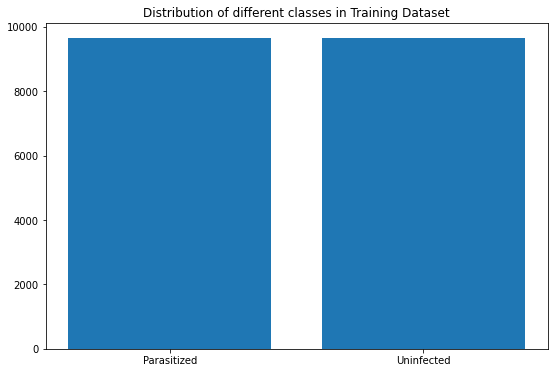

In [11]:
# Exploring training dataset

# Exploring training dataset (parasitised cells is equivalent to infected cells)
infected_train_dir = os.path.join('/content/output/train/Parasitized')
uninfected_train_dir = os.path.join('/content/output/train/Uninfected')


print('Total training infected malaria cell images :', len(os.listdir(infected_train_dir)))
print('Total training uninfected malaria cell images :', len(os.listdir(uninfected_train_dir)))

# creating a dictionary of the images in train dataset: values = number of images; key = Folder name
image_folder = ['Parasitized', 'Uninfected']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/output/train/'+i+'/'))
    dict_imgs[i]=nimages


#plotting a bargraph
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

Total Testing infected malaria cell images : 1378
Total Testing uninfected malaria cell images : 1378


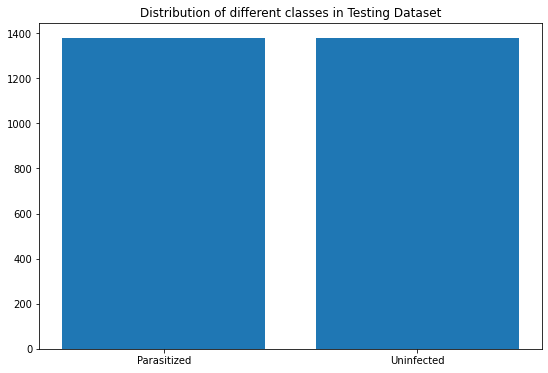

In [12]:
# Exploring testing Dataset

#creating variables for each folder
infected_test_dir = os.path.join('/content/output/test/Parasitized')
uninfected_test_dir = os.path.join('/content/output/test/Uninfected')


print('Total Testing infected malaria cell images :', len(os.listdir(infected_test_dir)))
print('Total Testing uninfected malaria cell images :', len(os.listdir(uninfected_test_dir)))

# creating a dictionary of the images in test dataset: values = number of images; key = Folder name
image_folder = ['Parasitized', 'Uninfected']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/output/test/'+i+'/'))
    dict_imgs[i]=nimages


#plotiing a bargraph
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

In [13]:
# Exploring Validation Dataset

#creating variables for each folder
infected_val_dir = os.path.join('/content/output/val/Parasitized')
uninfected_val_dir = os.path.join('/content/output/val/Uninfected')


print('Total Validation infected malaria cell images :', len(os.listdir(infected_val_dir)))
print('Total Validation uninfected malaria cell images :', len(os.listdir(uninfected_val_dir)))

# creating a dictionary of the images in test dataset: values = number of images; key = Folder name
image_folder = ['Parasitized', 'Uninfected']
dict_imgs = {}              
for i in image_folder:
    nimages = len(os.listdir('/content/output/val/'+i+'/'))
    dict_imgs[i]=nimages


#plotiing a bargraph
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.bar(range(len(dict_imgs)), list(dict_imgs.values()), align='center')
plt.xticks(range(len(dict_imgs)), list(dict_imgs.keys()))
plt.title('Distribution of different classes in Testing Dataset')
plt.show()

Total Validation infected malaria cell images : 2756
Total Validation uninfected malaria cell images : 2756


In [14]:
# creating a variables which contains all the names of the files
infected_train_files = os.listdir(infected_train_dir)
uninfected_train_files = os.listdir(uninfected_train_dir)

#creating a list of Organic and Recyclable waste images (path of the images)
pic_index = 3
next_I = [os.path.join(infected_train_dir, fname) for fname in infected_train_files[pic_index-3 : pic_index]]
next_U = [os.path.join(uninfected_train_dir, fname) for fname in uninfected_train_files[pic_index-3 : pic_index]]

(127, 121, 3)


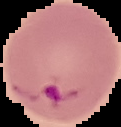

In [15]:
# Checking the size of an image by plotting a random image 
import PIL.Image as Image
import cv2
print(cv2.imread(next_I[0]).shape)
Image.open(next_I[0])

Mote: Resizing is needed before we proceed for modelling


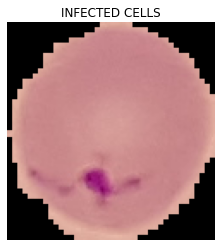

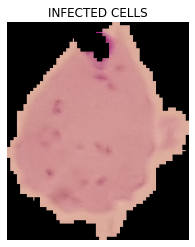

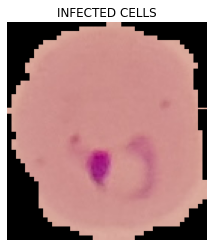

In [16]:
# Plotting the first 3 images classified as Infected and Uninfected waste
import matplotlib.image as mpimg

# Infected malaria cells
for i, img_path in enumerate(next_I):
  img = mpimg.imread(img_path)
  plt.title('INFECTED CELLS')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

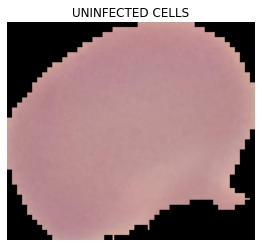

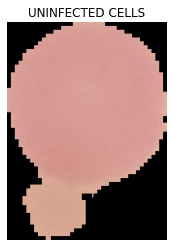

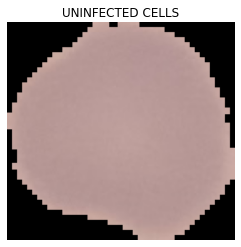

In [17]:
# uninfected malaria cell images
for i, img_path in enumerate(next_U):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('UNINFECTED CELLS')
  plt.axis('off')
  plt.show()

## 3. Data Augmentation

The process of enhancing the amount and variety of data is known as data augmentation. We don't acquire new data; instead, we transform existing data. Geometric changes such as flipping, rotation, translation, cropping, and scaling are some of the easy transformations applied to the image. These are necessary to enrich our dataset and capture every possible augmentation so that model captures the same image in it's dofferent transformations. Below shows the different transformations of the orginal image.

![](attachment:Capture1.JPG)

Image Source: https://www.mygreatlearning.com/blog/understanding-data-augmentation/

In [18]:
# importing necessary libraries for Data Augmentation

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# pre-trained model import
from tensorflow.keras.applications import resnet_v2, vgg16

### 3.1 Training and validation dataset

There are two steps in creating the generator:

1. Instantiate ImageDataGenerator with required parameters for augmention
2. Use appropriate flow command to construct the generator which will yield tuples of (x,y). These are batches of tensor image data from the appropriate folder.

Check out the documention of this class: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [46]:

image_shape = (130, 130, 3)
batch = 32

# Training Generator
training_dir = '/content/output/train/'

#For VGG16
training_vgg16_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input, #preprocessing step for an input to a pretrained architecture
                                      rotation_range = 40, #rotates the images by 40 deg
                                      width_shift_range = 0.2, # Shifts the image along the width dimension.
                                      height_shift_range = 0.2, #Shifts the image along the height dimension
                                      shear_range = 0.2, # Range for shear angle in counter-clockwise direction in degrees
                                      zoom_range = 0.2, # Range for random zoom
                                      horizontal_flip = True, # flips the image horizontally
                                      vertical_flip = True, # flips the image vertically
                                      fill_mode = 'nearest') # Points to the nearest image
                             
train_vgg16_generator = training_vgg16_datagen.flow_from_directory( training_dir, # directory from which the images are collected
                                               target_size = image_shape[:2],
                                               color_mode ='rgb',
                                               class_mode = 'binary', # since we only have two classes
                                               batch_size = batch,
                                               shuffle = True) 
#For Resnet50
training_resnet_datagen = ImageDataGenerator(preprocessing_function=resnet_v2.preprocess_input,
                                      rotation_range = 4
                                      width_shift_range =0, #rotates the images by 40 deg 0.2, # Shifts the image along the width dimension.
                                      height_shift_range = 0.2, #Shifts the image along the height dimension
                                      shear_range = 0.2, # Range for shear angle in counter-clockwise direction in degrees
                                      zoom_range = 0.2, # Range for random zoom
                                      horizontal_flip = True, # flips the image horizontally
                                      vertical_flip = True, # flips the image vertically
                                      fill_mode = 'nearest') # Points to the nearest image

train_resnet_generator = training_resnet_datagen.flow_from_directory( training_dir, # directory from which the images are collected
                                               target_size = image_shape[:2],
                                               color_mode ='rgb',
                                               class_mode = 'binary', # since we only have two classes
                                               batch_size = batch,
                                               shuffle = True) 


# Validation dataset
validation_dir = '/content/output/val/'

#For VGG16
validation_vgg16_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)

validation_vgg16_generator = validation_vgg16_datagen.flow_from_directory(validation_dir,
                                                   target_size = image_shape[:2],
                                                   color_mode ='rgb',
                                                   batch_size = batch,
                                                   class_mode = 'binary',
                                                   shuffle = True)

#For Resnet50
validation_resnet_datagen = ImageDataGenerator(preprocessing_function=resnet_v2.preprocess_input)

validation_resnet_generator = validation_resnet_datagen.flow_from_directory(validation_dir,
                                                   target_size = image_shape[:2],
                                                   color_mode ='rgb',
                                                   batch_size = batch,
                                                   class_mode = 'binary',
                                                   shuffle = True)

Found 19290 images belonging to 2 classes.
Found 19290 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


### 3.2 Testing Set

In [79]:
testing_dir = '/content/output/test/'

# For VGG16
testing_vgg16_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)


testing_vgg16_generator = testing_vgg16_datagen.flow_from_directory(  testing_dir,
                                                              target_size = image_shape[:2],
                                                              class_mode = 'binary',
                                                              batch_size = batch)

# For Resnet50
testing_resnet_datagen = ImageDataGenerator(preprocessing_function=resnet_v2.preprocess_input)


testing_resnet_generator = testing_resnet_datagen.flow_from_directory(  testing_dir,
                                                              target_size = image_shape[:2],
                                                              class_mode = 'binary',
                                                              batch_size = batch)

Found 2756 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


## 4. Modeling - VGG16

The model consists of 6 (Convoluion + Pooling layers + Dropout) layers with a Dense layer. The activation function used was "Relu".

A CNN architecture comprises of multiple neural layers. The three main type of layers used are:
1. **Convolution layers**: The convolutional layer computes the convolutional operation of the input tensor images using kernel filters to extract fundamental features. 

    The convolution operation Paramters of Conv2D are

    1. The filter size used in each convolution layer: size (3,3)
    2. The first parameter is the number of filters
    3. Input shape is the tensor image (RGB) input from the training_datagen
    4. Padding used is of type 'same' (default)
    5. Activation is applied after convolution occurs (Relu is used)
    6. As the architecture deepens the number of filters are increased to extract minute features from the images.


2. **Pooling layers**: They are mainly used to reduce the dimensions of the tensor output vector after convolution opertion. This reduces the number of trainable paramters in back-propogation step. They are usually placed between 2 convolution layers. The filter size used in each MaxPool2D: size (2,2)


3. **Dense Layers**: The Fully connected dense layer are usually placed before the output dense layer and form the last few layers of a CNN Architecture. In this layer, the input image from the previous layers are flattened and fed to the fully connected layer. In this stage, the classification process begins to take place. The output layer is the last dense layer in the CNN architecture. It has 1 neuron for a binary classification problem and the activation function of "sigmoid" is used.

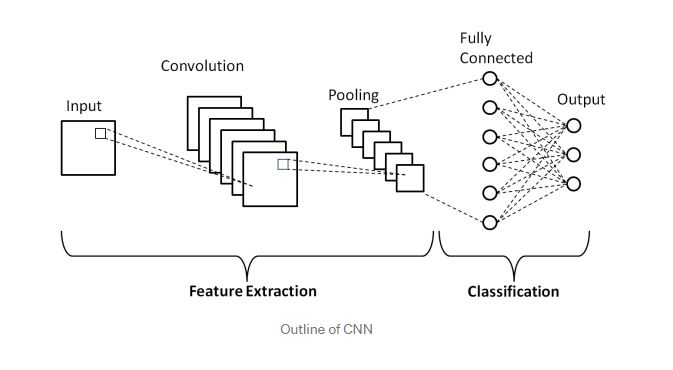

Useful resources to understand CNN:
1. https://in.mathworks.com/discovery/convolutional-neural-network-matlab.html
2. https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
3. https://datawow.io/blogs/interns-explain-cnn-8a669d053f8b



**VGG16 Architecture**

The runner-up in ILSVRC 2014 was the network from Karen Simonyan and Andrew Zisserman that became known as the VGGNet. Its main contribution was in showing that the depth of the network is a critical component for good performance. It had a very simple and classical architecture, with 2 or 3 convolutional layers, a pooling layer, then again 2 or 3 convolutional layers, a pooling layer, and so on plus a final dense network with 2 hidden layers and the output layer. It used only 3 × 3 filters, but many filters.

Their final best network contains 16 CONV/FC layers and, appealingly, features an extremely homogeneous architecture that only performs 3x3 convolutions and 2x2 pooling from the beginning to the end.

A downside of the VGGNet is that it is more expensive to evaluate and uses a lot more memory and parameters.  Most of these parameters are in the first fully connected layer, and it was since found that these FC layers can be removed with no performance downgrade, significantly reducing the number of necessary parameters.


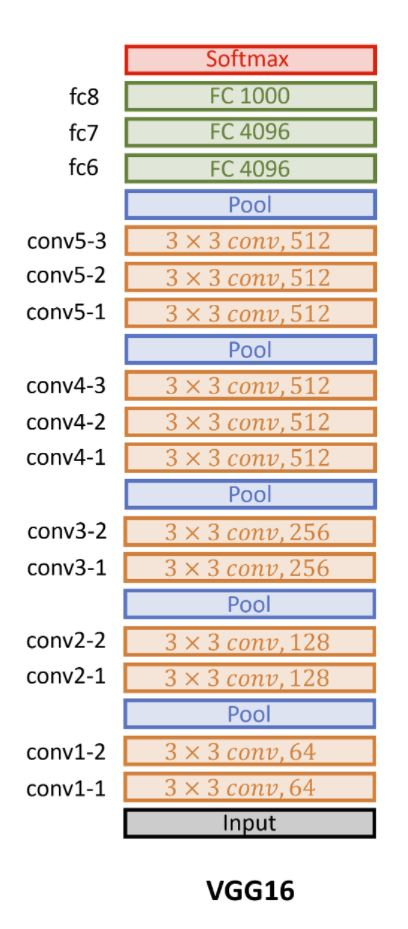


In [21]:
# importing nexessary libraries for Modeling a CNN
import tensorflow.keras as keras

# different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

# for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# Optimiser
from tensorflow.keras.optimizers import Adam

# For reading images
from skimage.io import imread, imshow
from keras.preprocessing import image

### 4.1 Model Architecture

In [22]:
# to clear the session everytime the notebook is re-run
keras.backend.clear_session()

In [23]:
from tensorflow.keras.applications import VGG16

#importing the base model as vgg16 with an input shape: 130,130,3; and the trainable weights from imagenet dataset
base_VGG16_model = VGG16(input_shape=(130, 130,3),
                          include_top=False,
                          weights="imagenet") # contains trainable weights from imagenet dataset

# freezing the top layers
for layer in base_VGG16_model.layers:
    layer.trainable = False

base_VGG16_model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130, 130, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 130, 130, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 130, 130, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 65, 65, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 65, 65, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 65, 65, 128)       147584    
______________________________________________________________

In [24]:
# using functional api model to add layers to final model architecture
headModel = base_VGG16_model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

model = Model(inputs=base_VGG16_model.input, outputs=headModel)



model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130, 130, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 130, 130, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 130, 130, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 65, 65, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 65, 65, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 65, 65, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

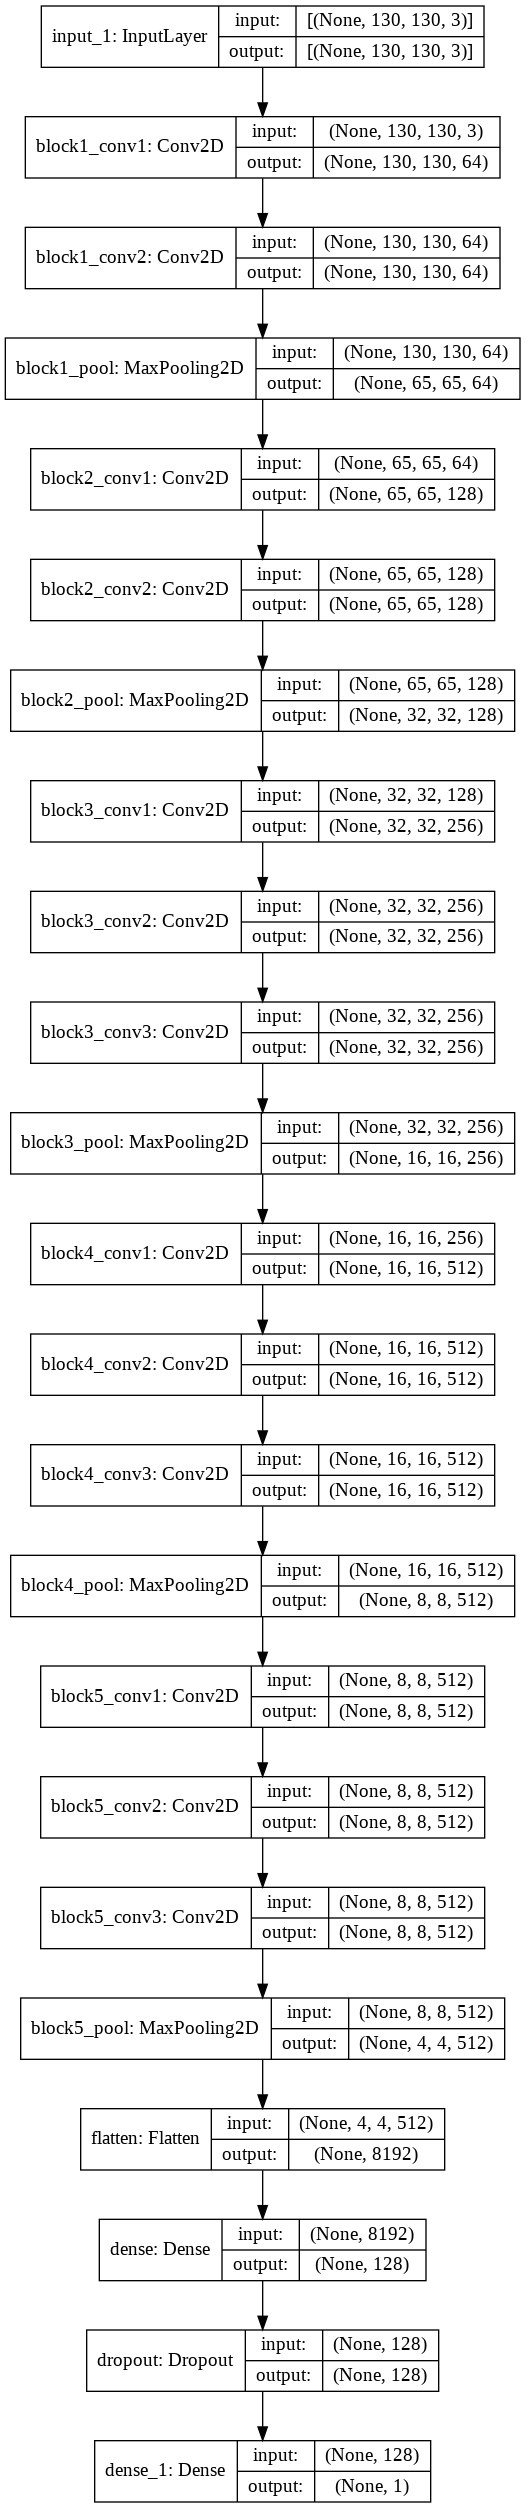

In [25]:
#view layers of network in visual form
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

### 4.2. Defining callbacks:

A callback is a set of functions to be applied at given stages of the training procedure.

1. ModelCheckpoint: Helps you save your model when validation accuracy reaches a minimum in between training before overfitting.
2. ReduceLROnPlateau: Helps you reduce your learning rate by a factor when the last few val_accuracy hasn't been changed. Hence, helps in convergence faster.

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 4, # if for the past 3 epochs, the accuracy remians constant
                                            factor = 0.6, # decrease the learning rate by 0.6
                                            min_lr = 0.00001)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint_model    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', # model with maximum val_accuracy is saved
                                save_best_only=True, 
                                verbose = 1)

callback_list = [learning_rate_reduction, checkpoint_model]


#compilation of the model
model.compile(optimizer=Adam(), # one of the best optimisers
              loss='binary_crossentropy', # since it is binary classification
              metrics = ['accuracy']) # performance metrics used

### 4.3. Training the model

Note: The difference between a training step and an epoch is that a training step is one gradient update. One whole cycle of the training data constitutes an epoch. This normally entails a number of steps.

In [ ]:
history = model.fit_generator(train_vgg16_generator,
                              epochs=15,
                              steps_per_epoch = 100,
                              verbose=1,
                              validation_data= validation_vgg16_generator, # using the validation dataset created
                              callbacks = callback_list # giving the callback list
                              )

Epoch 1/15
100/100 [==============================] - 68s 365ms/step - loss: 1.8364 - accuracy: 0.7663 - val_loss: 0.2706 - val_accuracy: 0.8930

Epoch 00001: val_accuracy improved from -inf to 0.89296, saving model to ./best_weights.hdf5
Epoch 2/15
100/100 [==============================] - 36s 357ms/step - loss: 0.3693 - accuracy: 0.8434 - val_loss: 0.2314 - val_accuracy: 0.9164

Epoch 00002: val_accuracy improved from 0.89296 to 0.91636, saving model to ./best_weights.hdf5
Epoch 3/15
100/100 [==============================] - 35s 351ms/step - loss: 0.3322 - accuracy: 0.8656 - val_loss: 0.2042 - val_accuracy: 0.9260

Epoch 00003: val_accuracy improved from 0.91636 to 0.92598, saving model to ./best_weights.hdf5
Epoch 4/15
100/100 [==============================] - 35s 347ms/step - loss: 0.3205 - accuracy: 0.8791 - val_loss: 0.2156 - val_accuracy: 0.9175

Epoch 00004: val_accuracy did not improve from 0.92598
Epoch 5/15
100/100 [==============================] - 35s 353ms/step - loss:

### 4.4. Loss/Accuracy Plots (Training and Validation)

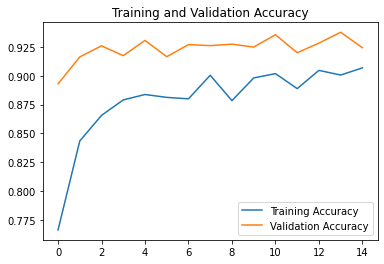

In [40]:
# SAVING THE DATA IN DIFFEREN APPROPRIATE VARIABLES
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Accuracy plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

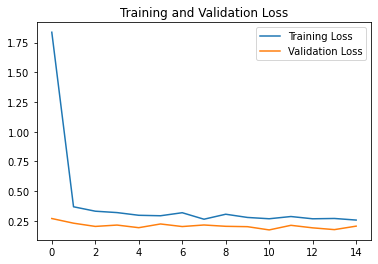

In [41]:
# Loss plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [42]:
# Evaluating Loss and AUC for Test data 

model.evaluate(testing_vgg16_generator)

87/87 [==============================] - 8s 91ms/step - loss: 0.1892 - accuracy: 0.9278


[0.18919746577739716, 0.9277939200401306]

## 5. Modeling - RESNet

The ILSVRC 2015 challenge was won using a Residual Network (or ResNet), developed by Kaiming He et al., which delivered an astounding top-5 error rate under 3.6%, using an extremely deep CNN composed of 152 layers.

The degradation (of training accuracy) problem of deep networks is addressed by introducing a deep residual learning framework. Instead of hoping each few stacked layers directly fit a desired underlying mapping, we explicitly let these layers fit a residual mapping.

When training a neural network, the goal is to make it model a target function h(x). If you add the input x to the output of the network (i.e., you add a skip connection), then the network will be forced to model f(x) = h(x) – x rather than h(x). This is called ‘residual learning’.

It starts and ends exactly like GoogLeNet (except without a dropout layer), and in between is just a very deep stack of simple residual units. Each residual unit is composed of two convolutional layers (and no pooling layer), with Batch Normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, SAME padding).

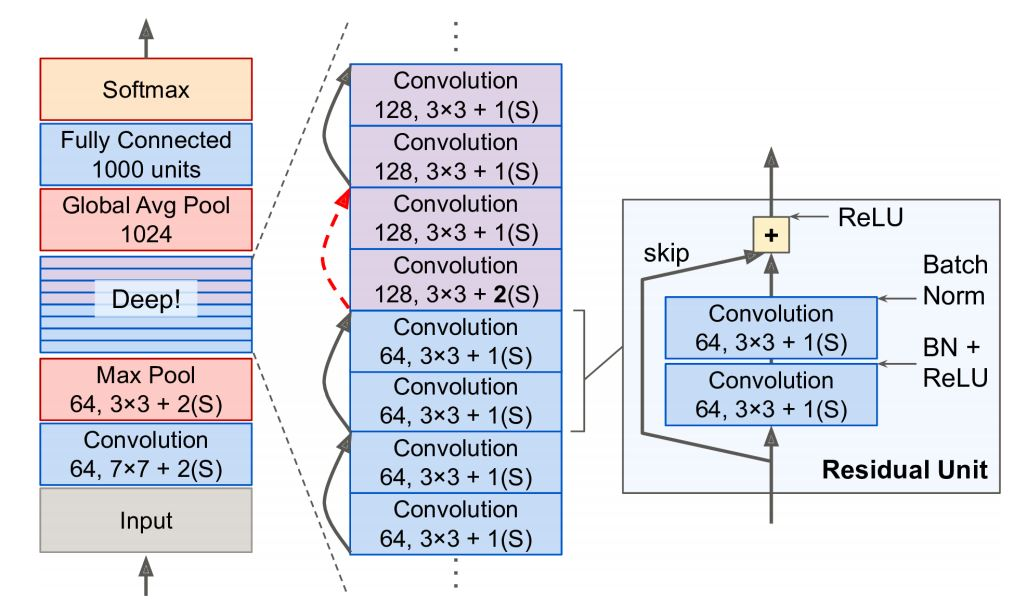

### 5.1 Model Architecture

In [68]:
# to clear the session everytime the notebook is re-run
keras.backend.clear_session()

In [69]:
from tensorflow.keras.applications import resnet_v2

#importing the base model as vgg16 with an input shape: 130,130,3; and the trainable weights from imagenet dataset
base_resnet50_model = resnet_v2.ResNet50V2(input_shape=(130, 130, 3),
                          include_top=False,
                          weights = "imagenet")
#freezing the top layers
for layer in base_resnet50_model.layers:
    layer.trainable = False

base_resnet50_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 130, 130, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 136, 136, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 65, 65, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 67, 67, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [70]:
# using functional api model to add layers to final model architecture
headModel = base_resnet50_model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

model_resnet50 = Model(inputs=base_resnet50_model.input, outputs=headModel)



model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 130, 130, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 136, 136, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 65, 65, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 67, 67, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

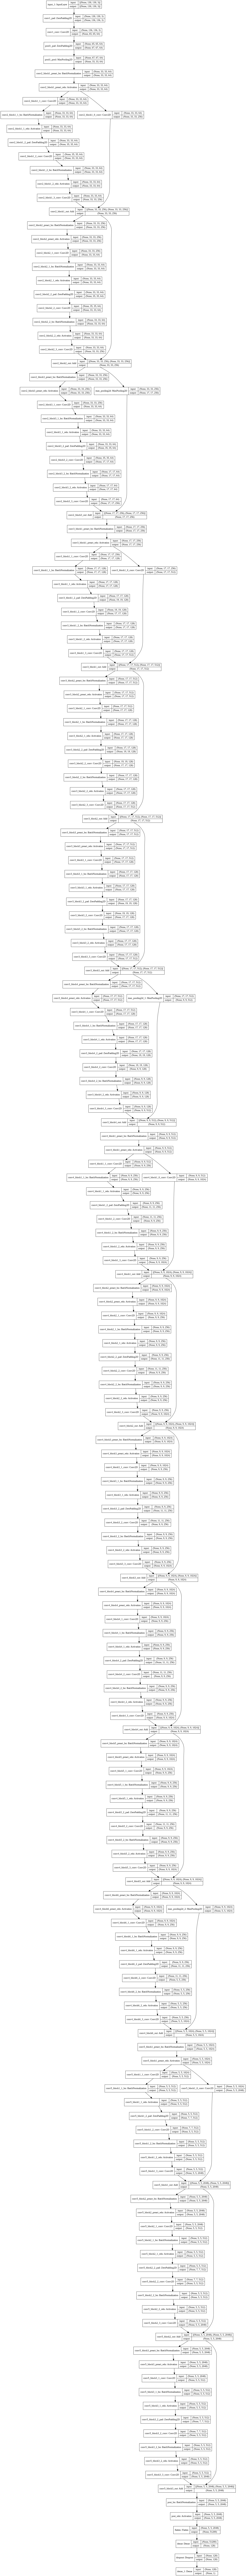

In [71]:
#view layers of network in visual form
tf.keras.utils.plot_model(model_resnet50,to_file='model.png',show_shapes=True)

### 5.2. Defining callbacks:

A callback is a set of functions to be applied at given stages of the training procedure.

1. ModelCheckpoint: Helps you save your model when validation accuracy reaches a minimum in between training before overfitting.
2. ReduceLROnPlateau: Helps you reduce your learning rate by a factor when the last few val_accuracy hasn't been changed. Hence, helps in convergence faster.

In [72]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 4, # if for the past 3 epochs, the accuracy remians constant
                                            factor = 0.6, # decrease the learning rate by 0.6
                                            min_lr = 0.00001)
# Defining Callbacks

filepath = './best_weights.hdf5'
checkpoint_model    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', # model with maximum val_accuracy is saved
                                save_best_only=True, 
                                verbose = 1)

callback_list = [learning_rate_reduction, checkpoint_model]


#compilation of the model
model_resnet50.compile(optimizer=Adam(), # one of the best optimisers
              loss='binary_crossentropy', # since it is binary classification
              metrics = ['accuracy']) # performance metrics used

### 5.3. Training the model

Note: The difference between a training step and an epoch is that a training step is one gradient update. One whole cycle of the training data constitutes an epoch. This normally entails a number of steps.

In [73]:
history_resnet = model_resnet50.fit_generator(train_resnet_generator,
                              epochs=15,
                              steps_per_epoch = 100,
                              verbose=1,
                              validation_data= validation_resnet_generator, # using the validation dataset created
                              callbacks = callback_list # giving the callback list
                              )

Epoch 1/15
100/100 [==============================] - 61s 387ms/step - loss: 1.3529 - accuracy: 0.7631 - val_loss: 0.3357 - val_accuracy: 0.8572

Epoch 00001: val_accuracy improved from -inf to 0.85722, saving model to ./best_weights.hdf5
Epoch 2/15
100/100 [==============================] - 37s 374ms/step - loss: 0.4491 - accuracy: 0.8096 - val_loss: 0.3108 - val_accuracy: 0.8643

Epoch 00002: val_accuracy improved from 0.85722 to 0.86430, saving model to ./best_weights.hdf5
Epoch 3/15
100/100 [==============================] - 37s 371ms/step - loss: 0.4020 - accuracy: 0.8281 - val_loss: 0.2806 - val_accuracy: 0.8940

Epoch 00003: val_accuracy improved from 0.86430 to 0.89405, saving model to ./best_weights.hdf5
Epoch 4/15
100/100 [==============================] - 37s 369ms/step - loss: 0.3783 - accuracy: 0.8363 - val_loss: 0.2710 - val_accuracy: 0.8895

Epoch 00004: val_accuracy did not improve from 0.89405
Epoch 5/15
100/100 [==============================] - 37s 367ms/step - loss:

### 5.4. Loss/Accuracy Plots (Training and Validation)

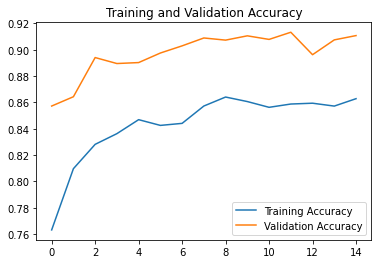

In [75]:
# SAVING THE DATA IN DIFFEREN APPROPRIATE VARIABLES
acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']
loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']
epochs_resnet = range(len(acc_resnet))

# Accuracy plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs_resnet, acc_resnet, label = 'Training Accuracy')
plt.plot(epochs_resnet, val_acc_resnet, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

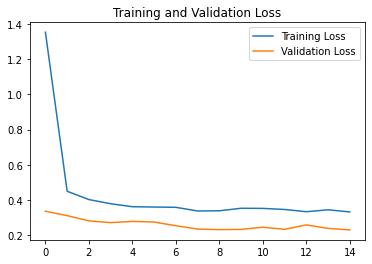

In [76]:
# Loss plot for traning and validation data for each epoch
plt.figure()
plt.plot(epochs_resnet, loss_resnet, label = 'Training Loss')
plt.plot(epochs_resnet, val_loss_resnet, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [80]:
# Evaluating Loss and AUC for Test data 

model_resnet50.evaluate(testing_resnet_generator)

87/87 [==============================] - 9s 100ms/step - loss: 0.2295 - accuracy: 0.9097


[0.22953522205352783, 0.9096516966819763]

## 6. Comparing the two pre-trained model performance

In [88]:
import pandas as pd
overall_dict = {'Model Architecture' : ["VGG16", "ResNet50"], 'Training Accuracy (%)' : ['88.38','85.87'] , "Validation accuracy" : ['93.07','91.33'] , 'Testing Accuracy' : ['92,78','90.97']}

Table_final = pd.DataFrame(overall_dict, index = None)
Table_final

Model Architecture Training Accuracy (%) Validation accuracy Testing Accuracy
0              VGG16                 88.38               93.07            92,78
1           ResNet50                 85.87               91.33            90.97

## 7.0 Testing the model

We choose the VGG16 re-trained model to test the images in the testing dataset as it had the highest testing accuracy

In [43]:
# printing the class labels for testing dataset
my_dict = testing_vgg16_generator.class_indices
idc = {k:v for v,k in my_dict.items()}
idc

{0: 'Parasitized', 1: 'Uninfected'}

In [32]:
import numpy as np

pred=model.predict(testing_vgg16_generator)
pred_digits=np.argmax(pred,axis=1)
np.all(pred_digits==0)

True

In [44]:
# now storing some properly classified indexes'.
i=0
prop_class=[]
prop_imgPaths=[]

for i in range(len(testing_vgg16_generator.classes)):
    if(np.argmax(testing_vgg16_generator.classes[i])==pred_digits[i]):
        prop_class.append(i)
        prop_imgPaths.append(testing_vgg16_generator.filepaths[i])
    if(len(prop_class)==20):
        break

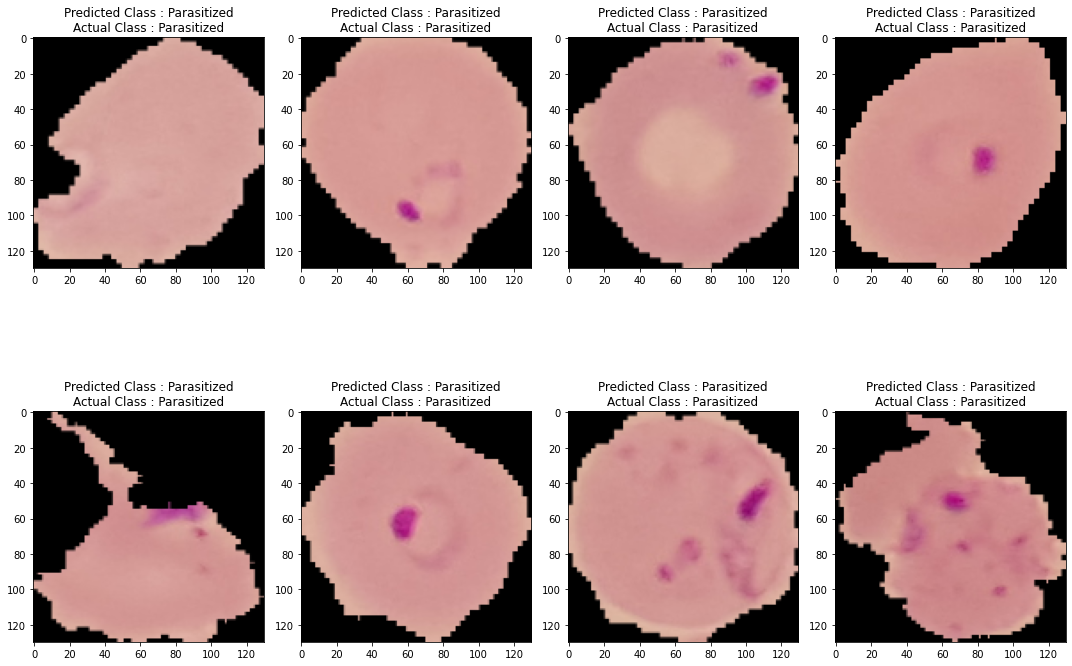

In [35]:
#Plotting Correctly classified images
import cv2
count=0
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (4):
        ax[i,j].imshow(cv2.resize(plt.imread(prop_imgPaths[count]),(130,130)))

        ax[i,j].set_title("Predicted Class : "+str(list(my_dict.keys())[list(my_dict.values()).index(pred_digits[prop_class[count]])])+"\n"+
                          "Actual Class : "+str(list(my_dict.keys())[list(my_dict.values()).index(testing_vgg16_generator.classes[count])]))
        
        plt.tight_layout()
        count+=1

In [37]:
# creating a variables which contains all the names of the files
I_test_files = os.listdir(infected_test_dir)
U_test_files = os.listdir(uninfected_test_dir)

#creating a list of Organic and Recyclable waste images (path of the images)
pic_index = 20
next_I_test = [os.path.join(infected_test_dir, fname) for fname in I_test_files[pic_index-3 : pic_index]]
next_U_test = [os.path.join(uninfected_test_dir, fname) for fname in U_test_files[pic_index-3 : pic_index]]
print(next_I_test)
print(next_U_test)

['/content/output/test/Parasitized/C82P43ThinF_IMG_20150817_124418_cell_157.png', '/content/output/test/Parasitized/C184P145ThinF_IMG_20151203_104030_cell_38.png', '/content/output/test/Parasitized/C101P62ThinF_IMG_20150918_155731_cell_62.png']
['/content/output/test/Uninfected/C47P8thin_Original_Motic_IMG_20150714_093512_cell_163.png', '/content/output/test/Uninfected/C132P93ThinF_IMG_20151004_152257_cell_87.png', '/content/output/test/Uninfected/C203ThinF_IMG_20151029_110105_cell_87.png']


The image is of an Infected Malaria cell 


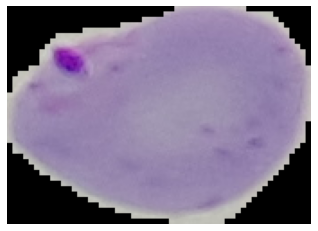

The image is of an Infected Malaria cell 


The image is of an Infected Malaria cell 


In [38]:
# Classifying the first three images in "Infected" folder of TEST using model
from keras_preprocessing import image
for i, img_path in enumerate(next_I_test):
    # loading the images as array
    img = image.load_img(img_path, target_size=(130,130))
    img = image.img_to_array(img)
    
    # rescaling the image
    img = tf.keras.applications.vgg16.preprocess_input(img)
    
    # showing the loaded image
    img1 = mpimg.imread(img_path)
    plt.imshow(img1)
    plt.axis('off')
    plt.show()

    # pre_processing step along with predicting the class probability
    img = np.expand_dims(img,axis=0)
    pred = model.predict(img)

    if pred[0][0] > 0.5:
         print("The image is of an Uninfected Malaria cell")
    else:
        print("The image is of an Infected Malaria cell ")


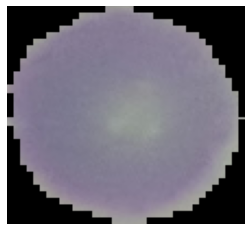

The image is of an Uninfected Malaria cell


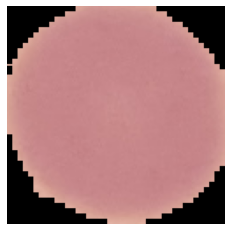

The image is of an Uninfected Malaria cell


The image is of an Uninfected Malaria cell


In [39]:
# Classifying the first three images in "Uninfected" folder of TEST using model
from keras_preprocessing import image
for i, img_path in enumerate(next_U_test):
    # loading the images as array
    img = image.load_img(img_path, target_size=(130,130))
    img = image.img_to_array(img)
    
    # rescaling the image
    img =  tf.keras.applications.vgg16.preprocess_input(img)
    
    # showing the loaded image
    img1 = mpimg.imread(img_path)
    plt.imshow(img1)
    plt.axis('off')
    plt.show()

    # pre_processing step along with predicting the class probability
    img = np.expand_dims(img,axis=0)
    pred = model.predict(img)

    if pred[0][0] > 0.5:
        print("The image is of an Uninfected Malaria cell")
    else:
        print("The image is of an Infected Malaria cell ")

### 7.1. Testing the model by creating a UI using Gradio

In [91]:
#library to create UI components to depoly and test the model
!pip install -q gradio


     |████████████████████████████████| 3.4 MB 11.7 MB/s 
     |████████████████████████████████| 206 kB 49.2 MB/s 
     |████████████████████████████████| 1.9 MB 35.5 MB/s 
     |████████████████████████████████| 3.2 MB 35.1 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 961 kB 39.1 MB/s 


In [92]:
 #for creating UI components 
import gradio as gr 
import requests

In [123]:
#since we have different size of images , resizing an infected image and saving it
Img1 = Image.open(next_I[0]).resize((130,130))
Img1.save("test_infected.png")

#### Creation of the UI

In [136]:
try:
  #used model trained using vgg16 as it performed well on both train and test data
  labels = ['Parasitized','Uninfected'] #classes

  def classify_image(inp):
    img = np.asarray(Img1)
    img = tf.keras.applications.vgg16.preprocess_input(img) #reshape input image
    img = np.expand_dims(img,axis=0)
    prediction = model_resnet50.predict(img).flatten()
    return labels[int(prediction[0])] #return classes

  image = gr.inputs.Image(shape=(130, 130))
  label = gr.outputs.Label()

  gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch(debug=True,share=True)

except KeyboardInterrupt:
      # do nothing here
      pass

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://47865.gradio.app
Interface loading below...


## 8. Conclusion

A Binary image classification model that classifies the the malaria cell images into Parasitised and Uninfected categories was created using transfer learning (VGG16 AND ResNet50). The best performing model was the re-trained VGG16 model with testing accuracy of 92.78%. 

The model's accuracy could be further improved by 
1. Reducing the batch size which increases the number of steps per epoch
2. Increasing the epochs as seen from the Loss/Accuracy graphs
3. Increasing the fully connected layers and filter sizes


In the testing phase, the model accurately classifies the three images mentioned. This was successfully implemented in a simple UI by gradio.


## 9. References

[1] https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2020/

[2] https://www.nhp.gov.in/disease/malaria

Article Links:
1. https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697
2. https://medium.com/iitg-ai/how-to-use-callbacks-in-keras-to-visualize-monitor-and-improve-your-deep-learning-model-c9ca37901b28#:~:text=What%20is%20callback%20in%20Keras%20A%20callback%20is,the%20model%20during%20training.%20Ok%20Let%E2%80%99s%20get%20started
3. https://medium.com/@sid321axn/malaria-cell-detection-using-convolution-neural-networks-cnn-5766d5599fbb